## Package Preparation

In [38]:
'''Installed'''
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
'''Additonal package requirements'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import dummy
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

### E1. Read file

In [40]:
df = pd.read_csv('lixcl68.csv')

### E2. Encoding categorical data type

In [41]:
df = df.drop(['age','job','marital','education', 'balance','contact','day','campaign','pdays','previous'],1)

In [42]:
df.head()

,default,housing,loan,duration,poutcome,y
0,no,no,yes,249,unknown,no
1,no,yes,no,58,unknown,no
2,no,yes,no,504,unknown,yes
3,no,yes,no,179,other,no
4,no,yes,no,511,failure,yes


In [43]:
#creating labelEncoder
lb_make = LabelEncoder()

# Converting string labels into numbers
lb_make = LabelEncoder()
df["default"] = lb_make.fit_transform(df["default"])
df["housing"] = lb_make.fit_transform(df["housing"])
df["loan"] = lb_make.fit_transform(df["loan"])
df["poutcome"] = lb_make.fit_transform(df["poutcome"])

df['y'] = lb_make.fit_transform(df['y'])

### E3. Setting festures and label

In [44]:
label = df['y']

features = list(zip(df["default"],df["housing"],df["loan"],
                    df['duration'], df["poutcome"]))

### E4. Setting up Folds and Cross Validaion

In [45]:
folds = KFold(n_splits=5, shuffle=True, random_state=0)
dc = dummy.DummyClassifier()

dt = DecisionTreeClassifier(criterion='gini', max_depth = 4,
                                max_features='sqrt', min_samples_leaf=7,
                                min_samples_split = 2, random_state=0)

dt_scores = cross_val_score(dt, features, label, scoring='precision', cv=folds)

print("Mean DT Accuracy:", np.mean(dt_scores))

Mean DT Accuracy: 0.6025520795779556


### E5. Model prediction

In [46]:
dt_pred = cross_val_predict(dt, features, label, cv=folds)
print(dt_pred)

dt_pred_matrix = confusion_matrix(label, dt_pred)
print(dt_pred_matrix)

[0 0 0 ... 0 0 0]
[[4317  108]
 [ 411  164]]


### E6. Evaluation using the confusion matrix

In [47]:
print('*** Decision Trees ***')
dt_confusion = pd.DataFrame(metrics.confusion_matrix(label, dt_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(dt_confusion)
print('=========================================================')
print(classification_report(label, dt_pred))

*** Decision Trees ***
            y_predict Yes  y_predict No
y_true Yes            164           411
y_ture No             108          4317
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4425
           1       0.60      0.29      0.39       575

    accuracy                           0.90      5000
   macro avg       0.76      0.63      0.67      5000
weighted avg       0.88      0.90      0.88      5000



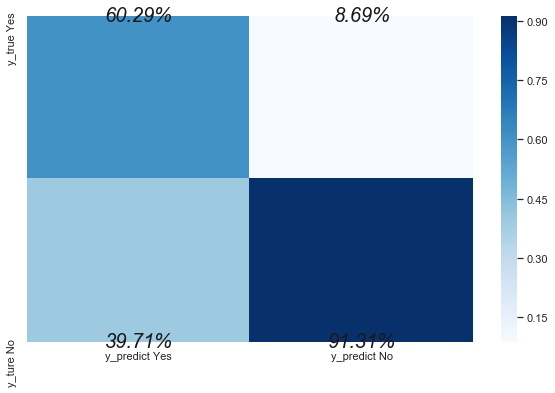

In [48]:
plt.figure(figsize=(10,6))
xticklables = ['y_predict Yes','y_predict No']
yticklables = ['y_true Yes','y_ture No']

annot_kws={'fontsize':20, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':1, 
           'verticalalignment':'center'}

sns.heatmap(dt_confusion/np.sum(dt_confusion), annot=True, 
            fmt='.2%', cmap='Blues',
           xticklabels = xticklables,
           yticklabels = yticklables,
           annot_kws = annot_kws)

## E7. Deployment

In [49]:
Decision_Trees = DecisionTreeClassifier(criterion='gini', max_depth = 4,
                                max_features='sqrt', min_samples_leaf=7,
                                min_samples_split = 2, random_state=0)
Decision_Trees.fit(features, label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

# Model Implementation

### Six Steps of Model Implementation
###### 1. Load in the new data 
###### 2. Encoding categorical data type
###### 3. Setting features and label
###### 4. Setting up Folds and Cross Validaion
###### 5. Model prediction
###### 6. Evaluation using the confusion matrix

### 1. Load in the new data 

In [ ]:
new_df = pd.read_csv('')

### 2. Encoding categorical data type

In [ ]:
lb_make = LabelEncoder()

lb_make = LabelEncoder()
df["x"] = lb_make.fit_transform(df["x"])
df["z"] = lb_make.fit_transform(df["z"])
df["w"] = lb_make.fit_transform(df["w"])
df["a"] = lb_make.fit_transform(df["a"])

df['y'] = lb_make.fit_transform(df['y'])

### 3. Setting features and label

In [ ]:
label = df['y']

features = list(zip(df["x"],df["z"],df["w"],
                    df['a'], df["b"]))

### 4. Setting up Folds and Cross Validaion

In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=0)
dc = dummy.DummyClassifier()

dt = DecisionTreeClassifier(criterion='gini', max_depth = 4,
                                max_features='sqrt', min_samples_leaf=7,
                                min_samples_split = 2, random_state=0)

dt_scores = cross_val_score(dt, features, label, scoring='precision', cv=folds)

print("Mean DT Accuracy:", np.mean(dt_scores))

### 5. Model prediction

In [ ]:
dt_pred = cross_val_predict(dt, features, label, cv=folds)
print(dt_pred)

dt_pred_matrix = confusion_matrix(label, dt_pred)
print(dt_pred_matrix)

### 6. Evaluation using the confusion matrix

In [ ]:
print('*** Decision Trees ***')
dt_confusion = pd.DataFrame(metrics.confusion_matrix(label, dt_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(dt_confusion)
print('=========================================================')
print(classification_report(label, dt_pred))

In [ ]:
plt.figure(figsize=(10,6))
xticklables = ['y_predict Yes','y_predict No']
yticklables = ['y_true Yes','y_ture No']

annot_kws={'fontsize':20, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':1, 
           'verticalalignment':'center'}

sns.heatmap(dt_confusion/np.sum(dt_confusion), annot=True, 
            fmt='.2%', cmap='Blues',
           xticklabels = xticklables,
           yticklabels = yticklables,
           annot_kws = annot_kws)